In [2]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt

ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[[200, 208, 207],
        [214, 222, 221],
        [132, 140, 139],
        ...,
        [236, 239, 244],
        [232, 236, 237],
        [164, 168, 169]],

       [[206, 215, 212],
        [186, 194, 193],
        [126, 134, 133],
        ...,
        [238, 238, 244],
        [232, 234, 235],
        [ 78,  80,  81]],

       [[203, 210, 207],
        [178, 185, 182],
        [141, 148, 145],
        ...,
        [240, 238, 244],
        [228, 229, 233],
        [ 79,  80,  84]],

       ...,

       [[190, 183, 190],
        [114, 110, 115],
        [196, 192, 197],
        ...,
        [147, 160, 158],
        [220, 231, 229],
        [222, 228, 227]],

       [[105,  91,  97],
        [102,  93,  96],
        [164, 157, 160],
        ...,
        [242, 238, 244],
        [244, 241, 243],
        [157, 154, 156]],

       [[108,  89,  92],
        [103,  84,  87],
        [113,  94,  97],
        ...,
        [171, 155, 162],
        [134, 119, 123],
        [113,  98, 102]

In [3]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [4]:
grey=[]
for i in range(len(ia)):
  esp=cv.cvtColor(ia[i], cv.COLOR_BGR2GRAY)
  grey.append(esp)


In [5]:
(grey[0]).shape
#plt.imshow(grey[0])

(173, 25)

In [6]:
grey[0]

array([[207, 221, 139, ..., 240, 236, 168],
       [213, 193, 133, ..., 240, 234,  80],
       [208, 183, 146, ..., 240, 230,  81],
       ...,
       [186, 112, 194, ..., 158, 229, 227],
       [ 94,  95, 159, ..., 240, 242, 155],
       [ 92,  87,  97, ..., 159, 122, 101]], dtype=uint8)

In [7]:
len(grey)

52

In [8]:
#from skimage import io
#image=io.imread('/content/drive/MyDrive/Tabulators-dataset/Dataset/bad/IMG_bad13.jpg')
#print(type(image))
#print(image.dtype)
#print(image.shape)
#plt.imshow(image)
sh=[]
siz=[]
for j in range(len(ia)):
  sh.append((grey[j]).shape)
  siz.append((grey[j]).size) 
print(sh) 
print(siz) 

[(173, 25), (183, 26), (185, 26), (184, 26), (184, 26), (186, 26), (179, 26), (174, 26), (160, 26), (198, 26), (198, 26), (179, 26), (156, 20), (156, 21), (158, 22), (154, 21), (156, 21), (184, 22), (185, 22), (185, 25), (186, 25), (184, 25), (193, 25), (193, 25), (191, 24), (193, 24), (193, 24), (188, 24), (189, 25), (166, 21), (199, 19), (197, 17), (177, 20), (174, 18), (175, 21), (177, 23), (177, 21), (176, 20), (178, 20), (191, 23), (166, 15), (161, 19), (174, 21), (177, 22), (168, 22), (164, 20), (173, 22), (166, 25), (165, 17), (175, 23), (174, 22), (177, 22)]
[4325, 4758, 4810, 4784, 4784, 4836, 4654, 4524, 4160, 5148, 5148, 4654, 3120, 3276, 3476, 3234, 3276, 4048, 4070, 4625, 4650, 4600, 4825, 4825, 4584, 4632, 4632, 4512, 4725, 3486, 3781, 3349, 3540, 3132, 3675, 4071, 3717, 3520, 3560, 4393, 2490, 3059, 3654, 3894, 3696, 3280, 3806, 4150, 2805, 4025, 3828, 3894]


52

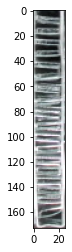

In [9]:
 plt.imshow(ia[0])
(ia[0]).shape
len(ia)

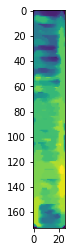

In [10]:
# Median Filter : remove the speckle noise of the image 
no_Lnoise=[]
for i in range(len(grey)):
  blur=median_filter(grey[i], 5)
  no_Lnoise.append(blur)
no_Lnoise
plt.imshow(no_Lnoise[0])

In [11]:
# Gaussian Filter: To highlight the edge of an image 
# Gaussian
#no_noise=[]
#for i in range(len(no_Lnoise)):
 # blar=cv.GaussianBlur(no_Lnoise[i], (5,5), 0)
 # no_noise.append(blar)
#plt.imshow(no_noise[0])

In [12]:
#print(ia[0])
#print(no_Lnoise[0])

In [13]:
#cv.imread(ia[0])
#plt.imshow(ia[0])

In [14]:
#(ia[0]).shape

In [15]:
#plt.imshow(no_Lnoise[0])

In [16]:
"""
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(ia[115])
plt.title('Original')

#plt.xticks([]), plt.yticks([])
#plt.subplot(132)
#plt.imshow(no_Lnoise[115])
#plt.title('no_Laplacian')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')

plt.xticks([]), plt.yticks([])
plt.subplot(122), 
plt.title('no_noise')
plt.imshow(ia[115]+ no_Lnoise[115] )
plt.show()
"""

"\nplt.figure(figsize=(10,7))\nplt.subplot(121)\nplt.imshow(ia[115])\nplt.title('Original')\n\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(132)\n#plt.imshow(no_Lnoise[115])\n#plt.title('no_Laplacian')\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')\n\nplt.xticks([]), plt.yticks([])\nplt.subplot(122), \nplt.title('no_noise')\nplt.imshow(ia[115]+ no_Lnoise[115] )\nplt.show()\n"

In [17]:
#Local Binary Pattern Features Extractors

from skimage import feature

def lbp_features(ima, radius=2, sampling_pixels=8):
  if (len(ima.shape) > 2):
    ima=ima.astype(float)
  ima=ima.astype(np.uint8)
  i_min=np.min(ima)
  i_max=np.max(ima)
  if (i_max-i_min !=0):
    ima=(ima-i_min)/(i_max-i_min)
  lbp= feature.local_binary_pattern(ima, sampling_pixels, radius, method='uniform')
  (hist, _)=np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels+3), range=(0, sampling_pixels+2))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  return hist


In [18]:
#from skimage.transform import rotate
#from skimage.feature import local_binary_pattern
#from skimage.color import label2rgb

In [19]:
"""
lbp_histo=[]
for i in range(len(grey)):
  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')
  n_bins=int(lbp.max()+1)
  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  lbp_histo.append(hist) 
  """

"\nlbp_histo=[]\nfor i in range(len(grey)):\n  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')\n  n_bins=int(lbp.max()+1)\n  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))\n  hist=hist.astype('float')\n  hist /= (hist.sum() + 1e-6)\n  lbp_histo.append(hist) \n  "

In [20]:
lbp_hist=[]
for i in range(len(no_Lnoise)):
  lbp_hist.append(lbp_features(no_Lnoise[i], 2, 8))
lbp_hist

[array([0.00508671, 0.03028902, 0.04439306, 0.10473988, 0.1532948 ,
        0.26219653, 0.08786127, 0.07236994, 0.15075145, 0.08901734]),
 array([0.00588483, 0.02374947, 0.03299706, 0.08764187, 0.1557377 ,
        0.27553594, 0.10235393, 0.0714586 , 0.10067255, 0.14396805]),
 array([0.00810811, 0.04303534, 0.04760915, 0.13264033, 0.21122661,
        0.23139293, 0.08711019, 0.06507277, 0.09355509, 0.08024948]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.0035153 , 0.0248139 , 0.03081059, 0.09615385, 0.17700579,
        0.29425145, 0.08043838, 0.07299421, 0.12758478, 0.09243176]),
 array([0.00601633, 0.02771809, 0.04297379, 0.11366566, 0.17984529,
        0.28599055, 0.08938547, 0.07348517, 0.07090675, 0.11001289]),
 array([0.00221043, 0.01392573, 0.

52


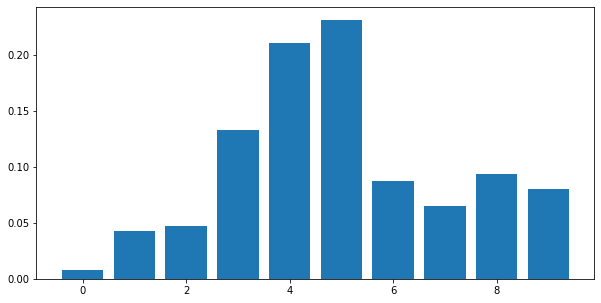

In [21]:
vals=range(len(lbp_hist[2]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbp_hist[2])
print(len(lbp_hist))

In [22]:
len(lbp_hist)

52

In [23]:
data_good=pd.DataFrame(lbp_hist)

In [24]:
data_good

,0,1,2,3,4,5,6,7,8,9
0,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
1,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
2,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
3,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
4,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
5,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
6,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
7,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
8,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
9,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [25]:
dat=(data_good).T

In [26]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0

In [27]:
dat.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat

,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0.107615,0.128706,0.138462,0.140110,0.11334

In [28]:
#from sklearn.neighbors import kneighbors_graph
#Graph=kneighbors_graph(dat,5, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False, n_jobs=None)

In [29]:
#Graph.toarray()

In [30]:
gd=dat.T
gd

,0,1,2,3,4,5,6,7,8,9
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [31]:
gd.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [32]:
gd
good=gd
good

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [33]:
ib=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ib.append(img_array)
print(ib)  

[array([[[226, 229, 227],
        [136, 137, 135],
        [126, 120, 121],
        ...,
        [146, 135, 137],
        [152, 138, 140],
        [130, 116, 118]],

       [[230, 237, 234],
        [168, 173, 171],
        [184, 182, 182],
        ...,
        [139, 133, 134],
        [144, 136, 137],
        [133, 122, 124]],

       [[227, 244, 241],
        [205, 219, 217],
        [230, 238, 237],
        ...,
        [134, 136, 137],
        [139, 139, 139],
        [144, 142, 142]],

       ...,

       [[ 86, 100,  99],
        [ 89, 103, 102],
        [ 98, 108, 108],
        ...,
        [160, 174, 172],
        [232, 244, 244],
        [147, 159, 159]],

       [[ 56,  72,  71],
        [ 75,  91,  90],
        [ 99, 111, 111],
        ...,
        [162, 176, 174],
        [236, 249, 247],
        [144, 157, 155]],

       [[ 45,  63,  62],
        [ 61,  77,  76],
        [ 73,  85,  85],
        ...,
        [153, 167, 165],
        [232, 245, 243],
        [143, 156, 154]

In [34]:
brey=[]
for i in range(len(ib)):
  espo=cv.cvtColor(ib[i], cv.COLOR_BGR2GRAY)
  brey.append(espo)

In [35]:
print(len(brey))
print(len(brey[0]))

53
160


53


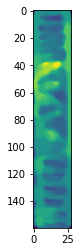

In [36]:
# Median Filter  : remove the speckle noise of the image 
no_Lbnoise=[]
for i in range(len(brey)):
  blurb=median_filter(brey[i], 5)
  no_Lbnoise.append(blurb)
no_Lbnoise
plt.imshow(no_Lbnoise[0])
print(len(no_Lbnoise))

In [37]:
lbpb_hist=[]
for i in range(len(no_Lbnoise)):
  lbpb_hist.append(lbp_features(no_Lbnoise[i], 2, 8))
lbpb_hist

[array([0.00491071, 0.0265625 , 0.04352679, 0.10111607, 0.21473214,
        0.28571429, 0.08147321, 0.06205357, 0.07075893, 0.10915179]),
 array([0.00367329, 0.02441659, 0.03824546, 0.1173293 , 0.18258427,
        0.27398444, 0.09269663, 0.06914434, 0.09269663, 0.10522904]),
 array([0.00176835, 0.02365164, 0.03603006, 0.10057471, 0.19319187,
        0.31697613, 0.07869142, 0.06366048, 0.08687003, 0.09858532]),
 array([0.00445344, 0.0194332 , 0.03603239, 0.10425101, 0.22004049,
        0.33259109, 0.07469636, 0.06336032, 0.07631579, 0.06882591]),
 array([0.00384538, 0.02428658, 0.02772718, 0.09269379, 0.20319773,
        0.27524793, 0.08722931, 0.0805505 , 0.12062336, 0.08459826]),
 array([0.0042735 , 0.02435897, 0.04038462, 0.13183761, 0.19059829,
        0.26538462, 0.07884615, 0.07521368, 0.12457265, 0.06452991]),
 array([0.00443906, 0.02602906, 0.03470541, 0.10451977, 0.23365617,
        0.29358354, 0.06961259, 0.05104923, 0.09644875, 0.08595642]),
 array([0.00406116, 0.03917821, 0.

10


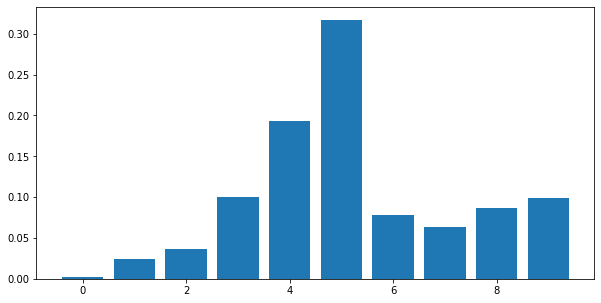

In [38]:
vals=range(len(lbpb_hist[2]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbpb_hist[2])
print(len(lbpb_hist[2]))

In [39]:
data_bad=pd.DataFrame(lbpb_hist)
data_bad

,0,1,2,3,4,5,6,7,8,9
0,0.004911,0.026562,0.043527,0.101116,0.214732,0.285714,0.081473,0.062054,0.070759,0.109152
1,0.003673,0.024417,0.038245,0.117329,0.182584,0.273984,0.092697,0.069144,0.092697,0.105229
2,0.001768,0.023652,0.036030,0.100575,0.193192,0.316976,0.078691,0.063660,0.086870,0.098585
3,0.004453,0.019433,0.036032,0.104251,0.220040,0.332591,0.074696,0.063360,0.076316,0.068826
4,0.003845,0.024287,0.027727,0.092694,0.203198,0.275248,0.087229,0.080550,0.120623,0.084598
5,0.004274,0.024359,0.040385,0.131838,0.190598,0.265385,0.078846,0.075214,0.124573,0.064530
6,0.004439,0.026029,0.034705,0.104520,0.233656,0.293584,0.069613,0.051049,0.096449,0.085956
7,0.004061,0.039178,0.049928,0.139990,0.225991,0.246297,0.085284,0.054228,0.077401,0.077640
8,0.004624,0.026590,0.039769,0.126705,0.217341,0.276532,0.080231,0.056879,0.082081,0.089249
9,0.009759,0.032067,0.052283,0.153364,0.202858,0.241548,0.076333,0.056117,0.108400,0.067271


In [40]:
dat1=(data_bad).T
dat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,0.004911,0.003673,0.001768,0.004453,0.003845,0.004274,0.004439,0.004061,0.004624,0.009759,0.005719,0.006536,0.004947,0.005049,0.004753,0.002244,0.004329,0.003982,0.005189,0.003961,0.009009,0.004227,0.005236,0.005482,0.005895,0.007576,0.002819,0.005613,0.005348,0.006244,0.007812,0.006763,0.005921,0.007108,0.004934,0.008949,0.003311,0.005540,0.005220,0.008327,0.007948,0.005428,0.006407,0.006462,0.006572,0.005655,0.007453,0.007347,0.008373,0.007022,0.007065,0.006897,0.007351
1,0.026562,0.024417,0.023652,0.019433,0.024287,0.024359,0.026029,0.039178,0.026590,0.032067,0.026490,0.022282,0.027520,0.021318,0.020202,0.021879,0.030303,0.025488,0.021405,0.027332,0.036036,0.028583,0.023665,0.033333,0.027368,0.030749,0.029400,0.030440,0.021604,0.034228,0.028429,0.038176,0.036842,0.037500,0.025987,0.048471,0.026490,0.023199,0.031868,0.036950,0.035022,0.029608,0.039588,0.032086,0.034775,0.025595,0.026084,0.042177,0.029605,0.033989,0.032755,0.035862,0.035872
2,0.043527,0.038245,0.036030,0.036032,0.027727,0.040385,0.034705,0.049928,0.039769,0.052283,0.045455,0.043969,0.039579,0.036466,0.044860,0.025526,0.046382,0.039227,0.047784,0.047138,0.043694,0.038849,0.042094,0.049342,0.043158,0.032531,0.042690,0.040155,0.042781,0.049954,0.043837,0.048866,0.050439,0.044363,0.037500,0.066368,0.050911,0.037742,0.039560,0.050742,0.050422,0.046879,0.047140,0.039439,0.033406,0.059524,0.046409,0.054422,0.043660,0.043258,0.046564,0.063908,0.048515
3,0.101116,0.117329,0.100575,0.104251,0.092694,0.131838,0.104520,0.139990,0.126705,0.153364,0.152619,0.180333,0.138528,0.101543,0.131016,0.080224,0.126160,0.104938,0.134486,0.127550,0.119820,0.121578,0.133403,0.164474,0.129263,0.107843,0.104511,0.117660,0.118930,0.139454,0.142578,0.115620,0.123904,0.089706,0.155921,0.162938,0.208609,0.153393,0.147527,0.151184,0.154744,0.168270,0.139588,0.107843,0.092826,0.165179,0.172087,0.121088,0.155203,0.123315,0.141940,0.175632,0.188768
4,0.214732,0.182584,0.193192,0.220040,0.203198,0.190598,0.233656,0.225991,0.217341,0.202858,0.188742,0.207962,0.181818,0.154278,0.197267,0.127069,0.185220,0.217642,0.173622,0.188552,0.184459,0.183575,0.175288,0.245395,0.173263,0.166221,0.183850,0.190199,0.208984,0.202590,0.214627,0.189136,0.193860,0.166176,0.210197,0.222222,0.215232,0.181440,0.231319,0.214676,0.196970,0.269430,0.215789,0.202540,0.167032,0.209226,0.230014,0.205170,0.220395,0.200281,0.215478,0.224828,0.226698
5,0.285714,0.273984,0.316976,0.332591,0.275248,0.265385,0.293584,0.246297,0.276532,0.241548,0.241421,0.214498,0.258813,0.307994,0.269756,0.282749,0.249536,0.289526,0.262054,0.252327,0.240541,0.256643,0.260314,0.243860,0.255789,0.237745,0.279702,0.245898,0.265241,0.237049,0.240451,0.253709,0.249561,0.267157,0.243421,0.230052,0.200331,0.225069,0.236264,0.254489,0.243169,0.253886,0.232037,0.252674,0.248905,0.228274,0.219173,0.237823,0.235048,0.245225,0.280347,0.223448,0.224640
6,0.081473,0.092697,0.078691,0.074696,0.087229,0.078846,0.069613,0.085284,0.080231,0.076333,0.078567,0.090612,0.079159,0.083310,0.066845,0.075456,0.083179,0.082636,0.083243,0.086156,0.080856,0.072061,0.084188,0.072807,0.092421,0.092246,0.083568,0.077720,0.079786,0.086031,0.095703,0.088133,0.084211,0.096078,0.079276,0.073826,0.078642,0.073061,0.074176,0.088993,0.094883,0.079447,0.076201,0.081328,0.099945,0.083929,0.082995,0.097143,0.092105,0.091573,0.087347,0.076782,0.089385
7,0.062054,0.069144,0.063660,0.063360,0.080550,0.075214,0.051049,0.054228,0.056879,0.056117,0.060807,0.070707,0.071429,0.080785,0.061200,0.077139,0.080087,0.060932,0.071135,0.063181,0.072748,0.069444,0.075393,0.040789,0.080421,0.106061,0.061216,0.079879,0.069733,0.053423,0.072483,0.060428,0.056140,0.074755,0.071053,0.052946,0.056291,0.077562,0.071703,0.054385,0.063587,0.037997,0.056751,0.076872,0.094743,0.060714,0.065718,0.064762,0.066089,0.086798,0.049775,0.061149,0.052044
8,0.070759,0.09269

In [41]:
dat1.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat1

,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b
0,0.004911,0.003673,0.001768,0.004453,0.003845,0.004274,0.004439,0.004061,0.004624,0.009759,0.005719,0.006536,0.004947,0.005049,0.004753,0.002244,0.004329,0.003982,0.005189,0.003961,0.009009,0.004227,0.005236,0.005482,0.005895,0.007576,0.002819,0.005613,0.005348,0.006244,0.007812,0.006763,0.005921,0.007108,0.004934,0.008949,0.003311,0.005540,0.005220,0.008327,0.007948,0.005428,0.006407,0.006462,0.006572,0.005655,0.007453,0.007347,0.008373,0.007022,0.007065,0.006897,0.007351
1,0.026562,0.024417,0.023652,0.019433,0.024287,0.024359,0.026029,0.039178,0.026590,0.032067,0.026490,0.022282,0.027520,0.021318,0.020202,0.021879,0.030303,0.025488,0.021405,0.027332,0.036036,0.028583,0.023665,0.033333,0.027368,0.030749,0.029400,0.030440,0.021604,0.034228,0.028429,0.038176,0.036842,0.037500,0.025987,0.048471,0.026490,0.023199,0.031868,0.036950,0.035022,0.029608,0.039588,0.032086,0.034775,0.025595,0.026084,0.042177,0.029605,0.033989,0.032755,0.035862,0.035872
2,0.043527,0.038245,0.036030,0.036032,0.027727,0.040385,0.034705,0.049928,0.039769,0.052283,0.045455,0.043969,0.039579,0.036466,0.044860,0.025526,0.046382,0.039227,0.047784,0.047138,0.043694,0.038849,0.042094,0.049342,0.043158,0.032531,0.042690,0.040155,0.042781,0.049954,0.043837,0.048866,0.050439,0.044363,0.037500,0.066368,0.050911,0.037742,0.039560,0.050742,0.050422,0.046879,0.047140,0.039439,0.033406,0.059524,0.046409,0.054422,0.043660,0.043258,0.046564,0.063908,0.048515
3,0.101116,0.117329,0.100575,0.104251,0.092694,0.131838,0.104520,0.139990,0.126705,0.153364,0.152619,0.180333,0.138528,0.101543,0.131016,0.080224,0.126160,0.104938,0.134486,0.127550,0.119820,0.121578,0.133403,0.164474,0.129263,0.107843,0.104511,0.117660,0.118930,0.139454,0.142578,0.115620,0.123904,0.089706,0.155921,0.162938,0.208609,0.153393,0.147527,0.151184,0.154744,0.168270,0.139588,0.107843,0.092826,0.165179,0.172087,0.121088,0.155203,0.123315,0.141940,0.175632,0.188768
4,0.214732,0.182584,0.193192,0.220040,0.203198,0.190598,0.233656,0.225991,0.217341,0.202858,0.188742,0.207962,0.181818,0.154278,0.197267,0.127069,0.185220,0.217642,0.173622,0.188552,0.184459,0.183575,0.175288,0.245395,0.173263,0.166221,0.183850,0.190199,0.208984,0.202590,0.214627,0.189136,0.193860,0.166176,0.210197,0.222222,0.215232,0.181440,0.231319,0.214676,0.196970,0.269430,0.215789,0.202540,0.167032,0.209226,0.230014,0.205170,0.220395,0.200281,0.215478,0.224828,0.226698
5,0.285714,0.273984,0.316976,0.332591,0.275248,0.265385,0.293584,0.246297,0.276532,0.241548,0.241421,0.214498,0.258813,0.307994,0.269756,0.282749,0.249536,0.289526,0.262054,0.252327,0.240541,0.256643,0.260314,0.243860,0.255789,0.237745,0.279702,0.245898,0.265241,0.237049,0.240451,0.253709,0.249561,0.267157,0.243421,0.230052,0.200331,0.225069,0.236264,0.254489,0.243169,0.253886,0.232037,0.252674,0.248905,0.228274,0.219173,0.237823,0.235048,0.245225,0.280347,0.223448,0.224640
6,0.081473,0.092697,0.078691,0.074696,0.087229,0.078846,0.069613,0.085284,0.080231,0.076333,0.078567,0.090612,0.079159,0.083310,0.066845,0.075456,0.083179,0.082636,0.083243,0.086156,0.080856,0.072061,0.084188,0.072807,0.092421,0.092246,0.083568,0.077720,0.079786,0.086031,0.095703,0.088133,0.084211,0.096078,0.079276,0.073826,0.078642,0.073061,0.074176,0.088993,0.094883,0.079447,0.076201,0.081328,0.099945,0.083929,0.082995,0.097143,0.092105,0.091573,0.087347,0.076782,0.089385
7,0.062054,0.069144,0.063660,0.063360,0.080550,0.075214,0.051049,0.054228,0.056879,0.056117,0.060807,0.070707,0.071429,0.080785,0.061200,0.077139,0.080087,0.060932,0.071135,0.063181,0.072748,0.069444,0.075393,0.040789,0.080421,0.106061,0.061216,0.079879,0.069733,0.053423,0.072483,0.060428,0.056140,0.074755,0.071053,0.052946,0.056291,0.077562,0.071703,0.054385,0.063587,0.037997,0.056751,0.076872,0.094743,0.060714,0.065718,0.064762,0.066089,0.086798,0.049775,0.061149,0.052044
8,0.070759,0.092697,0.086870,0.076316,0.120623,0.124573,0.096

In [42]:
db=dat1.T
db
db.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [43]:
db

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.004911,0.026562,0.043527,0.101116,0.214732,0.285714,0.081473,0.062054,0.070759,0.109152
b,0.003673,0.024417,0.038245,0.117329,0.182584,0.273984,0.092697,0.069144,0.092697,0.105229
b,0.001768,0.023652,0.036030,0.100575,0.193192,0.316976,0.078691,0.063660,0.086870,0.098585
b,0.004453,0.019433,0.036032,0.104251,0.220040,0.332591,0.074696,0.063360,0.076316,0.068826
b,0.003845,0.024287,0.027727,0.092694,0.203198,0.275248,0.087229,0.080550,0.120623,0.084598
b,0.004274,0.024359,0.040385,0.131838,0.190598,0.265385,0.078846,0.075214,0.124573,0.064530
b,0.004439,0.026029,0.034705,0.104520,0.233656,0.293584,0.069613,0.051049,0.096449,0.085956
b,0.004061,0.039178,0.049928,0.139990,0.225991,0.246297,0.085284,0.054228,0.077401,0.077640
b,0.004624,0.026590,0.039769,0.126705,0.217341,0.276532,0.080231,0.056879,0.082081,0.089249
b,0.009759,0.032067,0.052283,0.153364,0.202858,0.241548,0.076333,0.056117,0.108400,0.067271


In [44]:
bad=db
bad

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.004911,0.026562,0.043527,0.101116,0.214732,0.285714,0.081473,0.062054,0.070759,0.109152
b,0.003673,0.024417,0.038245,0.117329,0.182584,0.273984,0.092697,0.069144,0.092697,0.105229
b,0.001768,0.023652,0.036030,0.100575,0.193192,0.316976,0.078691,0.063660,0.086870,0.098585
b,0.004453,0.019433,0.036032,0.104251,0.220040,0.332591,0.074696,0.063360,0.076316,0.068826
b,0.003845,0.024287,0.027727,0.092694,0.203198,0.275248,0.087229,0.080550,0.120623,0.084598
b,0.004274,0.024359,0.040385,0.131838,0.190598,0.265385,0.078846,0.075214,0.124573,0.064530
b,0.004439,0.026029,0.034705,0.104520,0.233656,0.293584,0.069613,0.051049,0.096449,0.085956
b,0.004061,0.039178,0.049928,0.139990,0.225991,0.246297,0.085284,0.054228,0.077401,0.077640
b,0.004624,0.026590,0.039769,0.126705,0.217341,0.276532,0.080231,0.056879,0.082081,0.089249
b,0.009759,0.032067,0.052283,0.153364,0.202858,0.241548,0.076333,0.056117,0.108400,0.067271


In [45]:
""" 
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie) 
""" 

" \nie=[]\nIMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set\nfor img in os.listdir(IMG_DIR):\n  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale\n  ie.append(img_array)\nprint(ie) \n"

In [46]:
"""
erey=[]
for i in range(len(ie)):
  espe=cv.cvtColor(ie[i], cv.COLOR_BGR2GRAY)
  erey.append(espe)
"""

'\nerey=[]\nfor i in range(len(ie)):\n  espe=cv.cvtColor(ie[i], cv.COLOR_BGR2GRAY)\n  erey.append(espe)\n'

In [47]:
"""
print(len(erey))
print(len(erey[0]))
"""

'\nprint(len(erey))\nprint(len(erey[0]))\n'

In [48]:
# Median Filter : remove the speckle noise of the image 
"""
no_Lenoise=[]
for i in range(len(erey)):
  blure=median_filter(erey[i], 5)
  no_Lenoise.append(blure)
no_Lenoise
plt.imshow(no_Lenoise[0])
print(len(no_Lenoise))
"""

'\nno_Lenoise=[]\nfor i in range(len(erey)):\n  blure=median_filter(erey[i], 5)\n  no_Lenoise.append(blure)\nno_Lenoise\nplt.imshow(no_Lenoise[0])\nprint(len(no_Lenoise))\n'

In [49]:
"""
lbpe_hist=[]
for i in range(len(no_Lenoise)):
  lbpe_hist.append(lbp_features(no_Lenoise[i], 2, 8))
lbpe_hist
"""

'\nlbpe_hist=[]\nfor i in range(len(no_Lenoise)):\n  lbpe_hist.append(lbp_features(no_Lenoise[i], 2, 8))\nlbpe_hist\n'

In [50]:
"""
vals=range(len(lbpe_hist[3]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbpe_hist[3])
print(len(lbpe_hist[3]))
"""

'\nvals=range(len(lbpe_hist[3]))\nplt.figure(figsize=(10,5))\nplt.bar(vals, lbpe_hist[3])\nprint(len(lbpe_hist[3]))\n'

In [51]:
"""
data_emp=pd.DataFrame(lbpe_hist)
data_emp
"""

'\ndata_emp=pd.DataFrame(lbpe_hist)\ndata_emp\n'

In [52]:
"""
dat2=(data_emp).T
dat2
"""

'\ndat2=(data_emp).T\ndat2\n'

In [53]:
#dat2.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
#dat2

In [54]:
#de=dat2.T
#de
#de.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [55]:
#de

In [56]:
#empty=de
#empty
#len(empty)

In [57]:
#empty.to_excel('empty.xlsx')
#bad.to_excel("bad.xlsx")
#good.to_excel("good.xlsx")

In [58]:
#Real=pd.read_excel(r'/content/drive/MyDrive/Real_data.xlsx')
#work=pd.DataFrame(Real)
#work

In [59]:

frames=[bad, good]
Together=pd.concat(frames)
Together

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
b,0.004911,0.026562,0.043527,0.101116,0.214732,0.285714,0.081473,0.062054,0.070759,0.109152
b,0.003673,0.024417,0.038245,0.117329,0.182584,0.273984,0.092697,0.069144,0.092697,0.105229
b,0.001768,0.023652,0.036030,0.100575,0.193192,0.316976,0.078691,0.063660,0.086870,0.098585
b,0.004453,0.019433,0.036032,0.104251,0.220040,0.332591,0.074696,0.063360,0.076316,0.068826
b,0.003845,0.024287,0.027727,0.092694,0.203198,0.275248,0.087229,0.080550,0.120623,0.084598
...,...,...,...,...,...,...,...,...,...,...
g,0.003133,0.027470,0.041446,0.102892,0.180723,0.335181,0.095181,0.057590,0.085542,0.070843
g,0.008556,0.047415,0.052406,0.117647,0.160071,0.247059,0.105882,0.070945,0.113369,0.076649
g,0.007702,0.035031,0.042981,0.077019,0.136149,0.296894,0.091925,0.088944,0.128944,0.094410
g,0.008359,0.037356,0.042059,0.096917,0.177116,0.274033,0.093260,0.079415,0.096395,0.095089


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [61]:
# Spectral clustering by using Building functions

In [62]:
clustering=SpectralClustering(n_clusters=2, eigen_solver='arpack', n_components=2, random_state=42, n_init=10, gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)

In [63]:
labels=clustering.labels_
labels

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

(array([67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 38.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

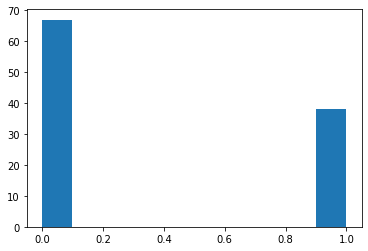

In [64]:
count1=0
count2=0
Table=[]
True_labels=[]
for i in range(52):
  True_labels.append(1)
for i in range(53):
  True_labels.append(0) 
for i in range(105):
  if True_labels[i]==labels[i]:count1+=1
  Table.append(labels[i])
Table
plt.hist(Table)

In [65]:
count1=0
count2=0
count3=0
count4=0
True_labels=[]
for i in range(52):
  True_labels.append(1)
for i in range(53):
  True_labels.append(0) 
for i in range(52):
  if True_labels[i]==labels[i]:count1+=1
  else: 
    count2+=1
for i in range(52, 105):
  if True_labels[i]==labels[i]:count3+=1
  else:
     count4+=1
print(count1)  
print(count2)
print(count3)   
print(count4)   

29
23
44
9


In [66]:
Accuracy=(count1+count3)*100/105
Accuracy

69.52380952380952

In [67]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [68]:
Matrix=Together.to_numpy()
Matrix

array([[0.00491071, 0.0265625 , 0.04352679, ..., 0.06205357, 0.07075893,
        0.10915179],
       [0.00367329, 0.02441659, 0.03824546, ..., 0.06914434, 0.09269663,
        0.10522904],
       [0.00176835, 0.02365164, 0.03603006, ..., 0.06366048, 0.08687003,
        0.09858532],
       ...,
       [0.00770186, 0.03503106, 0.04298137, ..., 0.0889441 , 0.1289441 ,
        0.09440994],
       [0.00835946, 0.03735632, 0.04205852, ..., 0.07941484, 0.09639498,
        0.09508882],
       [0.00770416, 0.03312789, 0.03415511, ..., 0.08834104, 0.1248074 ,
        0.08012327]])

In [69]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.99893014, 0.99905162, ..., 0.99431822, 0.99850366,
        0.99658125],
       [0.99893014, 1.        , 0.99872334, ..., 0.99686446, 0.9995637 ,
        0.99877756],
       [0.99905162, 0.99872334, 1.        , ..., 0.9964926 , 0.99852764,
        0.99716776],
       ...,
       [0.99431822, 0.99686446, 0.9964926 , ..., 1.        , 0.99812373,
        0.99812639],
       [0.99850366, 0.9995637 , 0.99852764, ..., 0.99812373, 1.        ,
        0.99922775],
       [0.99658125, 0.99877756, 0.99716776, ..., 0.99812639, 0.99922775,
        1.        ]])

In [70]:
from sklearn.metrics import pairwise_distances
A=np.exp(-1./(2*1)*pairwise_distances(Matrix, metric='sqeuclidean'))
A

array([[1.        , 0.99893014, 0.99905162, ..., 0.99431822, 0.99850366,
        0.99658125],
       [0.99893014, 1.        , 0.99872334, ..., 0.99686446, 0.9995637 ,
        0.99877756],
       [0.99905162, 0.99872334, 1.        , ..., 0.9964926 , 0.99852764,
        0.99716776],
       ...,
       [0.99431822, 0.99686446, 0.9964926 , ..., 1.        , 0.99812373,
        0.99812639],
       [0.99850366, 0.9995637 , 0.99852764, ..., 0.99812373, 1.        ,
        0.99922775],
       [0.99658125, 0.99877756, 0.99716776, ..., 0.99812639, 0.99922775,
        1.        ]])

In [71]:
#D = np.diag(np.sum(A,axis=1))
#L=np.power(D, -0.5)* A* np.power(D, -0.5)
#L

In [72]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [73]:
D.shape
D

array([[104.6123583 ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 104.76153105,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 104.56851393, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 104.44177116,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        104.73981911,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 104.73969794]])

In [74]:
D_half_inv

array([[0.09777065, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09770102, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09779115, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09785046, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09771114,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0977112 ]])

In [75]:
M

array([[ 0.9904409 , -0.00954207, -0.00955204, ..., -0.00951255,
        -0.00953899, -0.00952063],
       [-0.00954207,  0.99045451, -0.0095421 , ..., -0.00953011,
        -0.00954231, -0.00953481],
       [-0.00955204, -0.0095421 ,  0.99043689, ..., -0.00953535,
        -0.00954122, -0.00952823],
       ...,
       [-0.00951255, -0.00953011, -0.00953535, ...,  0.99042529,
        -0.00954314, -0.00954317],
       [-0.00953899, -0.00954231, -0.00954122, ..., -0.00954314,
         0.99045253, -0.0095401 ],
       [-0.00952063, -0.00953481, -0.00952823, ..., -0.00954317,
        -0.0095401 ,  0.99045252]])

In [76]:
(e_vals, e_vecs) = np.linalg.eigh(M) 

In [77]:
(e_vals, e_vecs)

(array([-1.63724273e-16,  9.97858632e-01,  9.99245546e-01,  9.99606973e-01,
         9.99819176e-01,  9.99843928e-01,  9.99919472e-01,  9.99969191e-01,
         9.99980047e-01,  9.99996394e-01,  9.99997964e-01,  9.99998979e-01,
         9.99999310e-01,  9.99999368e-01,  9.99999584e-01,  9.99999676e-01,
         9.99999772e-01,  9.99999843e-01,  9.99999877e-01,  9.99999889e-01,
         9.99999920e-01,  9.99999948e-01,  9.99999958e-01,  9.99999960e-01,
         9.99999963e-01,  9.99999974e-01,  9.99999979e-01,  9.99999981e-01,
         9.99999984e-01,  9.99999985e-01,  9.99999988e-01,  9.99999989e-01,
         9.99999992e-01,  9.99999993e-01,  9.99999995e-01,  9.99999996e-01,
         9.99999996e-01,  9.99999998e-01,  9.99999998e-01,  9.99999998e-01,
         9.99999998e-01,  9.99999999e-01,  9.99999999e-01,  9.99999999e-01,
         9.99999999e-01,  9.99999999e-01,  9.99999999e-01,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.0

In [78]:
# Let U be the matrix containing the differents vectors as columns

In [79]:
U=e_vecs
len(U)

105

In [80]:
# Form the matrix T from U by normalizing the rows to norm 1
import numba as nb
import numpy as np
id=U.shape
idx=id[0]
#@nb.njit(fastmath=True,error_model="numpy",parallel=True)
#def gaussian_kernel_2(X, X1, sigma):
T=np.empty((idx,idx))
for i in nb.prange(idx):
  for j in range(idx):
      bcc=0.
      for k in range(idx):
        bcc+=(U[i,k])**2
        T[i,j]=U[i,j]/np.sqrt(bcc)
print(T)

[[ 9.75928478e-02 -3.11540358e-02  1.83764031e-01 ... -4.45114380e-02
   0.00000000e+00  0.00000000e+00]
 [ 9.76624046e-02  1.12393278e-02  7.18801132e-02 ... -2.27242072e-02
  -7.10385937e-05 -1.19177440e-04]
 [ 9.75723944e-02  3.28906341e-02  2.26509983e-01 ... -2.83809564e-02
   1.02478152e-04 -4.04254412e-05]
 ...
 [ 9.75132450e-02  1.64802053e-01  6.33626845e-02 ... -1.04749164e-03
  -4.77685561e-05  1.13444936e-04]
 [ 9.76522838e-02  4.08140286e-02  7.01977110e-02 ...  8.32732705e-02
   2.87914018e-04  6.15567430e-05]
 [ 9.76522273e-02  5.91225188e-02 -2.47858731e-02 ...  4.65432399e-02
  -4.83372342e-04  1.53092664e-04]]


In [81]:
S=T[1]
sum=0
for i in range(len(S)):
 sum+=(S[i])**2
print(S)
print(sum)

[ 9.76624046e-02  1.12393278e-02  7.18801132e-02 -7.83881427e-02
 -3.47056894e-02 -9.02954248e-03  3.10618450e-02 -1.33353855e-01
 -5.40808398e-02  6.94125338e-02  7.73173050e-02  8.42641960e-02
  1.77995284e-02 -8.62714204e-02  1.44647727e-02 -1.26231196e-02
  6.64047182e-02  3.93271291e-02  6.04480061e-03 -7.50361377e-02
 -6.99525882e-02  3.18750364e-02  3.90897764e-02 -4.70814459e-04
  6.44899417e-02 -1.05881614e-01 -3.19937312e-02 -3.44795930e-02
  4.72087000e-02 -5.40059175e-02  1.26561961e-01 -2.41127801e-02
  4.17001334e-02  2.83550222e-02 -7.37999222e-02 -5.16247637e-02
  5.74246996e-02  1.42920699e-01 -7.63509946e-02  5.44011657e-02
 -5.35885203e-02  7.55335084e-02  1.25935260e-01 -7.82336258e-02
  1.51885977e-01  1.11631651e-02 -3.32713082e-02  1.06458905e-02
  8.48951955e-02 -9.32905036e-02  9.87389841e-02  5.63329295e-02
 -7.79762957e-03 -7.35167828e-03  1.99949809e-01  4.98669489e-02
  6.07658639e-02  1.25541823e-01  2.26675188e-02  1.24591676e-01
  1.23768213e-02 -9.13393

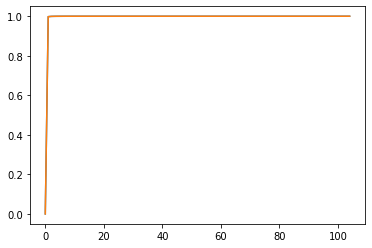

In [82]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [83]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([-1.63724273e-16,  9.97858632e-01,  9.99245546e-01,  9.99606973e-01,
        9.99819176e-01,  9.99843928e-01,  9.99919472e-01,  9.99969191e-01,
        9.99980047e-01,  9.99996394e-01,  9.99997964e-01,  9.99998979e-01,
        9.99999310e-01,  9.99999368e-01,  9.99999584e-01,  9.99999676e-01,
        9.99999772e-01,  9.99999843e-01,  9.99999877e-01,  9.99999889e-01,
        9.99999920e-01,  9.99999948e-01,  9.99999958e-01,  9.99999960e-01,
        9.99999963e-01,  9.99999974e-01,  9.99999979e-01,  9.99999981e-01,
        9.99999984e-01,  9.99999985e-01,  9.99999988e-01,  9.99999989e-01,
        9.99999992e-01,  9.99999993e-01,  9.99999995e-01,  9.99999996e-01,
        9.99999996e-01,  9.99999998e-01,  9.99999998e-01,  9.99999998e-01,
        9.99999998e-01,  9.99999999e-01,  9.99999999e-01,  9.99999999e-01,
        9.99999999e-01,  9.99999999e-01,  9.99999999e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

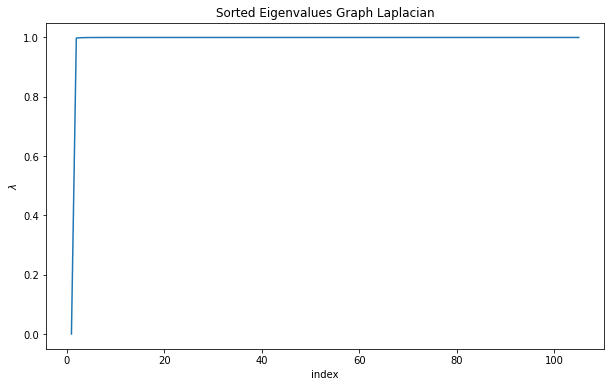

In [84]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

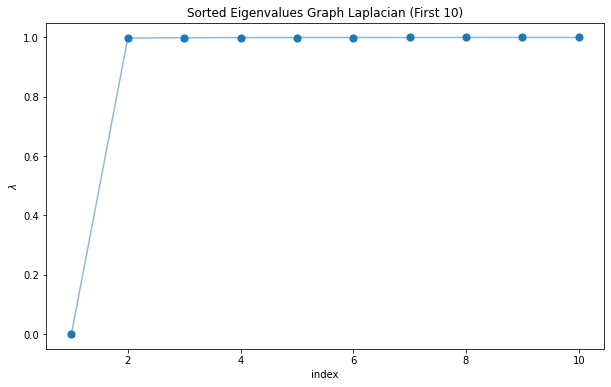

In [85]:
index_lim=10
fig, ax=plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [101]:
smallest_e_vals_index=np.argwhere((9.97858632e-01<e_vals)&(e_vals<9.99606972e-01))
e_vals[smallest_e_vals_index]
#np.where(e_vals==np.partition)(e_vals,1)[1]) # the second smallest eigenvalue 

array([[0.99924555]])

In [102]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()

,v_1
0,0.183764
1,0.071880
2,0.226510
3,0.298405
4,0.057561


In [103]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,6)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

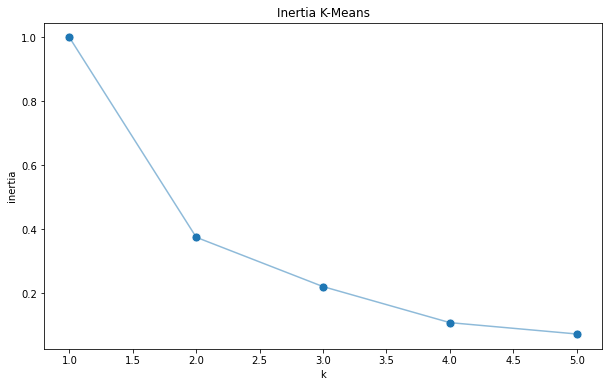

In [104]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [105]:
def run_k_means(do, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(do)
  cluster=k_means.predict(do)
  return cluster

cluster=run_k_means(proj_df, n_clusters=2)  
cluster

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [106]:
cout1=0
cout2=0
cout3=0
cout4=0
True_labels=[]
for i in range(52):
  True_labels.append(1)
for i in range(53):
  True_labels.append(0) 
for i in range(52):
  if True_labels[i]==cluster[i]:cout1+=1
  else: 
    cout2+=1
for i in range(52, 105):
  if True_labels[i]==cluster[i]:cout3+=1
  else:
     cout4+=1
print(cout1)  
print(cout2)
print(cout3)   
print(cout4)
print('Number of Bad images well classified on 52 is', 46)   
print('Number of Good images well classified on 53 is', 46)   

15
37
33
20
Number of Bad images well classified on 52 is 46
Number of Good images well classified on 53 is 46


In [107]:
Accuracy=(count2+count4)*100/105
Accuracy_for_Bad=(46/52)*100
Accuracy_for_Good=(46/53)*100
print('Total Accuracy', Accuracy)
print('Accuracy for Bad images', Accuracy_for_Bad)
print('Accuracy for Good images', Accuracy_for_Good)

Total Accuracy 30.476190476190474
Accuracy for Bad images 88.46153846153845
Accuracy for Good images 86.79245283018868


Text(0.3, 0.92, 'small Eigenvectors Cluster')

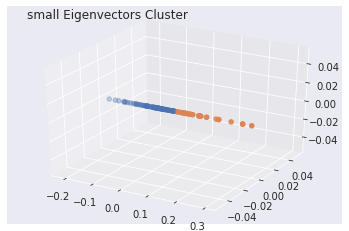

In [108]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=0, zs=0, c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('small Eigenvectors Cluster', x=0.3)